In [88]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']
X.shape

(307, 2)

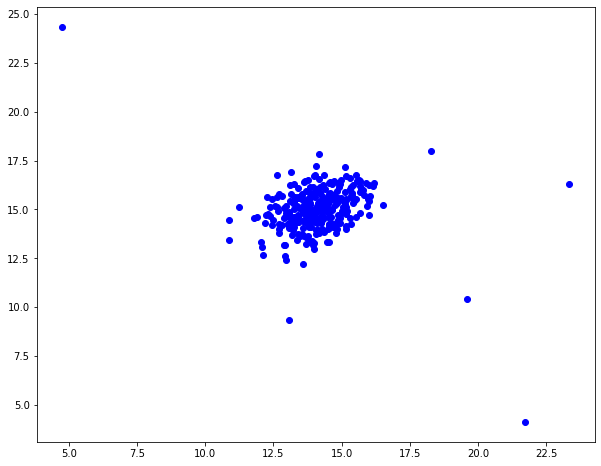

In [89]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c="blue")
plt.show()

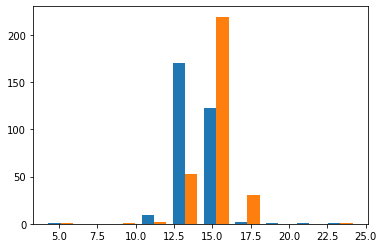

In [90]:
plt.hist(X)
plt.show()

In [91]:
def estimate_gaussian(X):  
    # TODO: calculate mu and sigma
    mu = []
    sigma = []
    for i in range(X.shape[1]):
        mu.append(np.mean(X[:,i]))
        sigma.append(np.std(X[:,i]))
    return mu, sigma
 
# TODO: run the function for your dataset
mu,sigma = estimate_gaussian(X)
mu,sigma

([14.112225783945592, 14.99771050813621],
 [1.353747174879607, 1.3075723042450764])

In [92]:
Xval = data['Xval']  
yval = data['yval']
 
# TODO: check the number of data (X.shape)
print(f"Xval.shape: {Xval.shape}")
print(f"yval.shape: {yval.shape}")

Xval.shape: (307, 2)
yval.shape: (307, 1)


In [93]:
from scipy import stats
# TODO: calculate the probability for X data
# prob = stats.norm.pdf(X[0:50,:],loc= mu,scale= sigma)
# prob
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], np.sqrt(sigma[0]))
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], np.sqrt(sigma[1]))
p

array([[2.25458226e-01, 3.40209319e-01],
       [2.85567439e-01, 1.94811182e-01],
       [3.41993486e-01, 2.63719915e-01],
       [2.70300081e-01, 2.05491151e-01],
       [3.08417584e-01, 2.46185337e-01],
       [3.38346311e-01, 1.32489729e-01],
       [1.85427041e-01, 2.77367029e-01],
       [1.38901157e-01, 2.57012685e-01],
       [7.25460568e-02, 2.00182333e-01],
       [1.58435768e-01, 3.47585632e-01],
       [3.40821118e-01, 7.10830589e-02],
       [3.42553100e-01, 3.23038223e-01],
       [2.82778502e-01, 3.08882329e-01],
       [2.83323572e-01, 2.99857922e-01],
       [3.40639214e-01, 1.12989082e-01],
       [3.42486823e-01, 3.13110959e-01],
       [3.40024180e-01, 3.40907586e-01],
       [3.27983919e-01, 3.48180871e-01],
       [3.15736078e-01, 2.68131856e-01],
       [7.39501829e-02, 8.38884790e-02],
       [3.04986487e-01, 3.11996607e-01],
       [3.40875428e-01, 3.43049846e-01],
       [2.61301271e-01, 1.44109035e-01],
       [3.40279936e-01, 3.37342902e-01],
       [1.975159

In [94]:
# TODO: calculate the probability for Xval data
# TODO: pval[:,0] =  
# TODO: pval[:,1] =
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], mu[0], np.sqrt(sigma[0]))
pval[:, 1] = stats.norm.pdf(Xval[:, 1], mu[1], np.sqrt(sigma[1]))
pval

array([[1.21192119e-01, 3.48097252e-01],
       [3.15728464e-01, 3.34460955e-01],
       [2.77989020e-01, 1.51637786e-01],
       [3.09385027e-01, 2.36485788e-01],
       [2.93594882e-01, 2.98648541e-01],
       [2.07997025e-01, 2.11816729e-01],
       [2.01693209e-01, 3.44722071e-01],
       [3.37113866e-01, 3.24638030e-01],
       [5.82021500e-02, 2.90518077e-01],
       [2.79001430e-01, 3.47626752e-01],
       [3.15218701e-01, 3.24458009e-01],
       [1.25809586e-01, 3.46433134e-01],
       [2.17570325e-01, 2.70997149e-01],
       [7.74981228e-02, 1.35744478e-01],
       [2.86668505e-01, 2.14667172e-01],
       [1.92688882e-01, 2.39392263e-01],
       [1.69161340e-01, 2.68288948e-01],
       [1.88432250e-01, 3.42899859e-01],
       [3.32097183e-01, 2.89522024e-01],
       [1.89582739e-01, 2.55146942e-01],
       [3.42879312e-01, 3.35610366e-01],
       [1.85784191e-01, 1.82725753e-01],
       [3.15870048e-01, 3.48880790e-01],
       [3.38682154e-01, 2.64867572e-01],
       [3.000647

In [95]:
from sklearn.metrics import f1_score


def select_threshold(pval, yval):
    th_list = np.linspace(pval.min(), pval.max(), 1000)
    best_f1 = 0
    best_epsilon = 0
    for th in th_list:
        ypred = [int(i[0] < th or i[1] < th) for i in pval]
        f1 = f1_score(yval, ypred)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = th
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval,yval)
print(f"Best epsilon: {best_epsilon}")
print(f"Best F1: {best_f1}")

Best epsilon: 0.00034923001962944495
Best F1: 0.8750000000000001


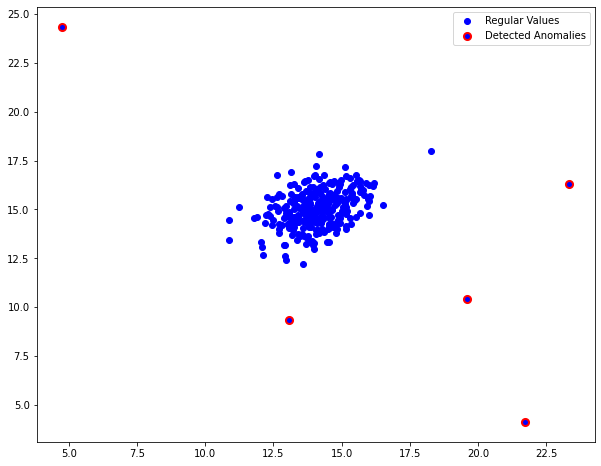

In [96]:
indexes = np.where([i[0] < best_epsilon or i[1] < best_epsilon for i in p])

anom = [X[i] for i in indexes][0]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c="blue")
plt.scatter(anom[:,0],anom[:,1],c="blue",linewidths = 2,marker ="o",edgecolor ="red",s = 50)
plt.legend(["Regular Values", "Detected Anomalies"])
plt.show()